1
Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
[[1 0 0 1 0 1 1 0 0 1 1 1 1 1 

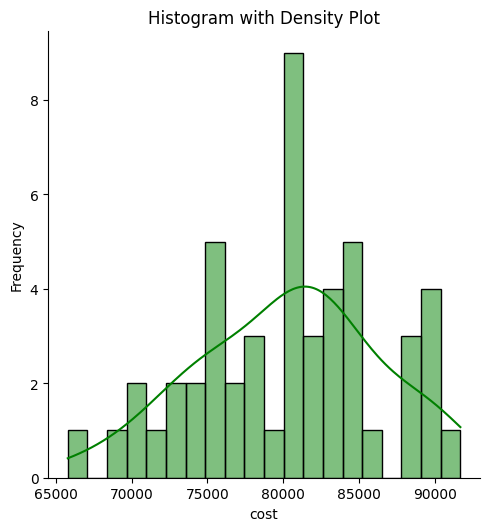

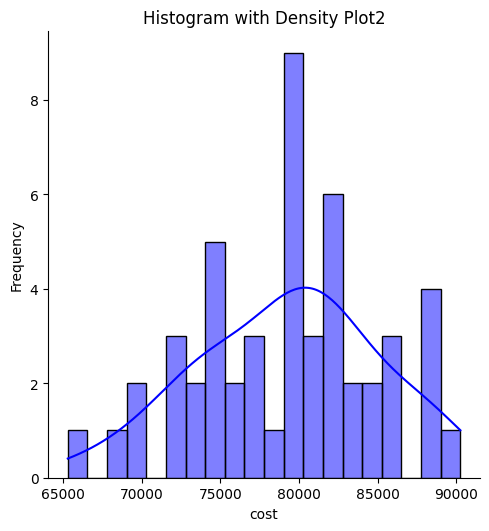

In [2]:
from sympy import *
from sympy import Matrix, zeros
from sympy import eye
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, Poly
import seaborn as sns
from sympy.polys.galoistools import gf_gcd, gf_div, gf_gcdex
from sympy.polys.domains import ZZ
from numpy.random import SeedSequence, default_rng
import multiprocessing
def mod2(matrix):
    """Reduce a matrix to modulo 2"""
    return np.mod(matrix, 2)

def gf2_rref(matrix):
    """Compute the reduced row echelon form (RREF) of a matrix in GF(2)"""
    matrix = mod2(matrix)
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    row, col = 0, 0
    while row < rows and col < cols:
            if matrix[row, col] == 0:
                for r in range(row + 1, rows):
                    if matrix[r, col] == 1:
                        matrix[[row, r]] = matrix[[r, row]]
                        break
            if matrix[row, col] == 1:
                for r in range(rows):
                    if r != row and matrix[r, col] == 1:
                        matrix[r] = mod2(matrix[r] + matrix[row])
                row += 1
            col += 1
    return matrix
def kernel_gf2(matrix):
    """Compute the kernel of a matrix in GF(2)"""
    matrix_rref = gf2_rref(matrix)
    rows, cols = matrix_rref.shape
    pivot_cols = []
    for r in range(rows):
        for c in range(cols):
            if matrix_rref[r, c] == 1:
                pivot_cols.append(c)
                break
    free_vars = [c for c in range(cols) if c not in pivot_cols]
    kernel_basis = []
    for free_var in free_vars:
        basis_vector = np.zeros(cols, dtype=int)
        basis_vector[free_var] = 1
        for pivot_col in pivot_cols:
            row = pivot_cols.index(pivot_col)
            if matrix_rref[row, free_var] == 1:
                basis_vector[pivot_col] = 1
        kernel_basis.append(basis_vector)
    return np.array(kernel_basis).T
def polynomial_to_circulant(poly, l):   
    x = symbols('x')    
    if not isinstance(poly, Poly):
        poly = Poly(poly, x,domain=ZZ)   
    coeffs = poly.all_coeffs()   
    coeffs.reverse()    
    circulant_matrix = np.zeros((l, l), dtype=int)   
    for i in range(l):
        a1 = np.pad( coeffs, (0, l - len( coeffs)), 'constant')
        circulant_matrix[i] = row = np.roll(a1, i)

    return circulant_matrix

def inverse_in_binary_field(A):
    
    det_A = np.linalg.det(A) % 2 

    if det_A == 0:
        print("Matrix A is not invertible in the binary field.")
        return None
    else:
        n = A.shape[0]
        
        aug_matrix = np.hstack([A, np.eye(n)])

        
        for i in range(n):
            
            pivot_row = i
            while pivot_row < n and aug_matrix[pivot_row, i] == 0:
                pivot_row += 1
            
           
            if pivot_row == n:
                print("Matrix A is not invertible in the binary field.")
                return None
            
            
            if pivot_row != i:
                aug_matrix[[i, pivot_row]] = aug_matrix[[pivot_row, i]]
            
            
            for j in range(n):
                if j != i and aug_matrix[j, i] == 1:
                    aug_matrix[j] = (aug_matrix[j] + aug_matrix[i]) % 2
        
        
        if not np.array_equal(aug_matrix[:, :n], np.eye(n)):
            print("Matrix A is not invertible in the binary field.")
            return None
        else:
            
            A_inv = aug_matrix[:, n:]
            return A_inv.astype(int)  
def make_trailing_columns_zero(A):
    """
    Modify the matrix A such that all trailing columns (after the first m columns) are zero.

    Args:
    - A: numpy array, the input matrix

    Returns:
    - A_modified: numpy array, the modified matrix with trailing columns zeroed out
    """
    A1 = np.matrix(np.array(A.tolist()))
    m, n = A1.shape
    A1 = gf2_rref(A1)
    A1_modified = np.copy(A1)  # Create a copy to avoid modifying the original matrix
    last_row = A1_modified[-1]
    indices = np.nonzero(last_row)[0]
    l = indices[0]

    A1_modified[:, l+1:] = 0
 
    return A1_modified

x = symbols('x')
n =31
k = 5

h_X = 1 + x**2 + x**5 
H_X =x**k*h_X.subs(x, 1/x)
R_X = 1 + x**31
Hn = polynomial_to_circulant(h_X, n)
Hn_T = polynomial_to_circulant(H_X, n)
rowspaceH4 = Hn_T[:n-k]
b = Poly(h_X, x, domain=ZZ).all_coeffs()
r = Poly(R_X, x, domain=ZZ).all_coeffs()
#a.reverse()
b.reverse()
r.reverse()
G_X,_ = gf_div(r,b , 2, ZZ)

g_X = sum(coef * x**i for i, coef in enumerate(G_X))
G_X =x**(n-k)*g_X.subs(x, 1/x)
#给出H
G = polynomial_to_circulant(g_X, n)
G = G.T
#G_T = polynomial_to_circulant(G_X, n)
G_T = polynomial_to_circulant(G_X, n)
G_T = G_T.T
G = G[:k]
G_T = G_T[:k]
rowspaceH3 = Hn[:n-k]

if __name__ == "__main__":    
    A = rowspaceH3   
    A1_modified = make_trailing_columns_zero(A)
    A1_modified2 = Matrix( A1_modified.tolist())
M = Matrix()
for i in range(n): 
    e_i = eye(n)[i, :]     
    is_linearly_dependent = any(e_i==(A1_modified2.row(j)) for j in range(A1_modified.shape[0]))    
    if not is_linearly_dependent:
        
        M = M.row_insert(M.rows, e_i)
print(M)
M1 = np.matrix(np.array(M.tolist()))
if __name__ == "__main__":       
    A11_modified = make_trailing_columns_zero(rowspaceH4)
    A11_modified2 = Matrix( A11_modified.tolist())

N = Matrix()


for i in range(n):  
    e_i = eye(n)[i, :]  
    
    is_linearly_dependent = any(e_i==(A11_modified2.row(j)) for j in range(A11_modified.shape[0]))
    
    if not is_linearly_dependent:
        
        N = N.row_insert(N.rows, e_i)
print(N)
N1 = np.matrix(np.array(N.tolist()))

original_list = list(range(n))
reversed_list = original_list[::-1]
Ker_H = G[:, reversed_list]
Ker_H = Matrix(Ker_H.tolist())
Ker_H = gf2_rref(Ker_H)
Ker_H1T = G_T[:, reversed_list]
Ker_H1T = Matrix(Ker_H1T.tolist())
Ker_H1T  = gf2_rref(Ker_H1T)




original_listrow = list(range(5))
reversed_listrow = original_listrow[::-1]
Ker_H = Ker_H[reversed_listrow, :]

Ker_H1T =Ker_H1T[reversed_listrow, :]
Ker_H = Ker_H[:, reversed_list]
Ker_H1T = Ker_H1T[:, reversed_list]
print(Ker_H )
print(Ker_H1T )
Ker_H = np.matrix(np.array(Ker_H.tolist()))########################################################矩阵的核
Ker_H1T = np.matrix(np.array(Ker_H1T.tolist()))
LogicalX = np.kron(Ker_H, M1)
LogicalZ = np.kron(M1,Ker_H )

LogicalX1 = np.kron(N1,Ker_H1T )
LogicalZ1 = np.kron(Ker_H1T,N1 )  

O_X = np.zeros((25,31*31))
def swap_columns(matrix, col1, col2):
    matrix[:, [col1, col2]] = matrix[:, [col2, col1]]
    return matrix
def swap_rows(matrix, row1, row2):
    matrix[[row1,row2],:] = matrix[[row2,row1],:]
    return matrix

def create_identity_at_top(matrix):
    """Ensure the first k rows and k columns form an identity matrix using column swaps"""
    rows, cols = matrix.shape
    P = np.eye(cols)
    
    for i in range(rows):
        if matrix[i, i] != 1:
            
            for j in range(i + 1, cols):
                if matrix[i, j] == 1:
                    swap_columns(matrix, i, j)
                    swap_rows(P,i, j)
                    break
    return matrix,P
max_nonzero_per_row = 4

def generate_generator_matrix(k,seed):
    
    rng = default_rng(seed)
    n = 25*2 
   
    P = np.zeros((k, n-k), dtype=int)
    for i in range(k):
        non_zero_count = rng.integers(0, max_nonzero_per_row + 1)  
        non_zero_indices = rng.choice(n-k, non_zero_count, replace=False) 
        P[i, non_zero_indices] = 1 
       
    I_n = np.eye(n)
    P_T=P.T
   
    permutation = rng.permutation(n)
    
    M = I_n[permutation,:]
   
    I = np.eye(k)
    I_T = np.eye(n-k)
    O_nk = np.zeros((k, n-k))
    O_k = np.zeros((n-k, k))
   
    V1_X =  np.hstack((I, P))
    
    V1_Z =  np.hstack((O_k, I_T))
    V_X = np.dot(V1_X , M)
    V_Z = V1_Z @ M
    
    
    U1_X = np.hstack((P_T, I_T))
    U1_Z = np.hstack((I, O_nk))
    
    U_X = U1_X @ M
   
    U_Z = U1_Z @ M
    return V_X , V_Z , U_X , U_Z
LogicalX0 = np.hstack((LogicalX , O_X ))
LogicalZ0 = np.hstack((LogicalZ , O_X ))
LogicalX10 = np.hstack((O_X , LogicalX1 ))
LogicalZ10 = np.hstack((O_X , LogicalZ1 ))
LogicalX_q =  np.vstack((LogicalX0 , LogicalX10 ))
LogicalZ_q =  np.vstack((LogicalZ0 , LogicalZ10 ))
results_0 = []
results1_0 = []
results1_1 = []
n = 31
I = np.eye(n)
H_Z1 = np.kron(Hn, I)
H_Z2 = np.kron(I, Hn_T)
H_Z = np.hstack((H_Z1,H_Z2))
#
#
# the qubits cost of log_2 {q}-1 branch stickers   d_R = 2
def split_matrix(matrix, count=0, side="root", m_total=0):   
    result1 = {}    
    if matrix.shape[0] <= 1:
        return result1, m_total
    

    non_zero_cols = [col_idx for col_idx in range(matrix.shape[1]) if not all(row[col_idx] == 0 for row in matrix)]
    filtered_matrix = H_Z[:, non_zero_cols]
    filtered_matrix = filtered_matrix[~np.all(filtered_matrix == 0, axis=1)]
    

    m = filtered_matrix.shape[0]
    l = filtered_matrix.shape[1]
    m_total += m + l # m_total += {d_R-1}m + {d_R-1}l
    

    mid_row = matrix.shape[0] // 2
    count += 1
    side_label = f"{side}{count}"
    result1[side_label] = matrix
    top_half, m_total = split_matrix(matrix[:mid_row], count, "top", m_total)
    bottom_half, m_total = split_matrix(matrix[mid_row:], count, "bottom", m_total)
    result1.update(top_half)
    result1.update(bottom_half)
    
    return result1,m_total

def process_row(V_X):
    Y = 0
    Y1 = 0
    #
    #
    # the qubits cost of q measurement stickers that q is the number of logical operators.
    for j in range(V_X.shape[0]):
        #
        #
        #the qubits cost of a measurement sticker 
        row_vector = V_X[j]
        row_vector = row_vector.reshape(1, -1)
        delelogicalX =  np.dot(row_vector , LogicalX_q)%2
        U_X1 = kernel_gf2(row_vector).T
        delelogicalZf =np.dot(U_X1 , LogicalZ_q)%2 
       
        non_zero_cols = [col_idx for col_idx in range(LogicalX_q.shape[1]) if not np.all(delelogicalX[:, col_idx] == 0)]
        
        filtered_matrix = H_Z[:, non_zero_cols]
        delelogicalZf = delelogicalZf[:, non_zero_cols]
        filtered_matrix1 = np.array(filtered_matrix.tolist())
        filtered_matrix2 = filtered_matrix1[~np.all(filtered_matrix1 == 0, axis=1)]
        delelogicalX2 = delelogicalX[:,non_zero_cols ]
        f = delelogicalX2.shape[1]
        saved_rows = []   
        saved_rows1 = []
        K = kernel_gf2(filtered_matrix2).T
        for row in K:
            row_matrix = row.reshape(1, -1)
            result_vector = row_matrix@delelogicalZf.T%2#np.dot(row_matrix,delelogicalZf.T) % 2
            result_vector = result_vector.flatten()
            if np.any(result_vector != 0):        
                    saved_rows2 = [r.flatten() for r in saved_rows1] 
                    m4 =0 
                    if len(saved_rows) != 0:
                        F = np.vstack(saved_rows)
                        m4 = F.shape[0]
                    saved_rows2.append(result_vector)
                    
                    saved_matrix2 = np.vstack(saved_rows2)
                    saved_matrix21 = gf2_rref(saved_matrix2)
                    
                    non_zero_rows = np.any(saved_matrix2 != 0, axis=1)
                    m3= np.sum(non_zero_rows)
                    if m3 > m4:
                        saved_rows.append(row)
                        saved_rows1.append(result_vector)


        delelogicalZ1 = np.empty((0,0))
        if saved_rows:
           delelogicalZ1 = np.vstack(saved_rows)
           saved_matrix1 = np.vstack(saved_rows1)
        G_12 = delelogicalX2
        if delelogicalZ1.shape[0] != 0:
            G_12 = np.vstack(( delelogicalX2,delelogicalZ1))    
        m_N = G_12.shape[0]   
        G_12 = gf2_rref(G_12)
        G3 ,P1 = create_identity_at_top(G_12)   
        O_N = np.zeros((m_N,f-m_N))
        M = np.hstack((eye(m_N),O_N))
        barG1 = np.dot(delelogicalX2,P1.T)%2
        barG1 = np.dot(barG1,M.T)%2
        barD = kernel_gf2( barG1 ).T
        m2 = 0
        D = []
        if  barD.shape[0] != 0 :
           D = barD
           D = np.array(D.tolist())
           m2 = barD.shape[0]
           
        m = filtered_matrix2.shape[0]   
        m1 = filtered_matrix2.shape[1]
        Y1 += m1*15 + m2*16 + m*16
        if m2 != 0 :
          h = D.shape[1]
          count_col = [0] * h
          for row in D:
            count = 0
            for element in row:
                if element != 0:
                    count += 1
            if count > 6:
                log2_count = math.log(count, 5)
                g = math.ceil(log2_count)
                m1 = m1 + 5*(1-5**(g-1)) / (1-5) 
                m2 = m2 + 5*(1-5**(g-1)) / (1-5)
          for j in range(D.shape[1]):
                for i in range(D.shape[0]): 
                  if D[i][j] != 0:  
                    count_col[j] += 1 
          for j in range(D.shape[1]):
                if count_col[j] > 3:
                  log3_count_col = math.log(count_col[j], 2)
                  f = math.ceil(log3_count_col)
                  m2 = m2  + 2*(1-2**(f-1)) / (1-2)
                  m1 = m1  + 2*(1-2**(f-1)) / (1-2)
        Y += m1*15+ m2*16 + m*16
    result = (Y,Y1)
    return result
def thecost(v, seed):
    V_X,U_X,V_Z,U_Z = generate_generator_matrix(v, seed)
    LogicalX_qs0 = np.dot(V_X , LogicalX_q)%2
    LogicalZ_qs0 = np.dot(U_X , LogicalZ_q)%2
    LogicalX_qs = np.array(LogicalX_qs0.tolist())
    LogicalZ_qs = np.array(LogicalZ_qs0.tolist())
    non_zero_cols = [col_idx for col_idx in range(LogicalX_qs.shape[1]) if not all(row[col_idx] == 0 for row in LogicalX_qs)]
    filtered_matrix5 = H_Z[:, non_zero_cols]
    filtered_matrix5 = filtered_matrix5[~np.all(filtered_matrix5 == 0, axis=1)]
    m1 = filtered_matrix5.shape[0]
    l1 = filtered_matrix5.shape[1]
    #  m_total include m1+l1 Need to be dedected
    result = process_row(V_X)
    result1,m_total = split_matrix(LogicalX_qs, count=0, side="root", m_total=0)
    Y =  result[0]
    Y1 = result[1]
    Y1 = Y1 + m_total-m1-l1
    Y = Y + m_total-m1-l1        
    result2 = (Y1,Y)
    return result2
def parallel_computation(data):
    seeds = SeedSequence().spawn(len(data))
    args = [(v,seed) for v,seed in zip(data,seeds)]
    with multiprocessing.Pool(processes=50) as pool:
        result =  pool.starmap(thecost, args)
    return result
if __name__ == "__main__":
    dates = [40]*50 #  q=40
    results = parallel_computation(dates)
    

Y_values = [result[1] for result in results]
Y1_values = [result[0] for result in results]
print(results)

sns.displot(Y_values, bins=20, kde=True, color='green')
plt.title('Histogram with Density Plot')
plt.xlabel('cost')
plt.ylabel('Frequency')
plt.show()
sns.displot(Y1_values, bins=20, kde=True, color='blue')
plt.title('Histogram with Density Plot2')
plt.xlabel('cost')
plt.ylabel('Frequency')
plt.show()
